<a href="https://colab.research.google.com/github/EltonGS/covid-19_previsao_leito_UTI/blob/main/Notebooks/2_analise_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste notebook é feita a **análise exploratória e visualização dos dados** sobre pacientes com Covid-19, dados esses fornecidos pelo **Hospital Sírio Libanês** na plataforma **Kaggle**. Esses dados foram previamente tratados no notebook Tratamento de Dados. Esse é o segundo notebook, de 3, e faz parte do projeto final do **Bootcamp de Data Sciente Aplicada ministrado pela Alura Cursos Online**.

# Objetivo

O objetivo da **análise dos dados** é identificar como está construída a base de dados e assim **extrair informações importantes**. Informações que são dispostas em **gráficos** que tornam mais simples a compreensão da informaçõa presente nos dados.

As análises realizadas neste notebook buscam responder as questões abaixo:

- **Questão 1**: Quantos pacientes foram admitidos na UTI?
- **Questão 2**: Quantos pacientes eram do sexo masculino ou feminino?
- **Questão 3**: Quantos pacientes são idosos ou não idosos?
- **Questão 4**: Quantos pacientes idosos foram admitidos diretamente na UTI?

# Informações sobre os Dados

## Informações compartilhadas pelo Sírio Libanês

- Os dados são **anonimizados** e foram coletados nas unidades de São Paulo e Brasília. Os dados foram anonimizados utilizando as melhores práticas internacionais.

- Os dados disponíveis nessa base são:
> * Informação demográfica do paciente (03 colunas);
> * Agrupamento de doenças já existentes no paciente (09 colunas);
> * Resultados de exame de sangue (36 colunas);
> * Sinais vitais (06 colunas);

# Recursos utilizados

## Funções

In [1]:
def prepare_window(rows):
  """
  Essa função identifica se o paciente em algum momento foi para a UTI,
  e preenche essa informação na coluna ICU da janela 0-2.
  Retorna somente a linha da janela 0-2
  """
  if (np.any(rows['icu'])):
    rows.loc[rows['window'] == '0-2', 'icu'] = 1
  return rows.loc[rows['window'] == '0-2']

In [2]:
def dimensao_dados (dados):
  """
  Essa função verifica as dimensões do dataframe
  Retorna a quantidade de linhas e colunas
  """
  # verifica as dimensões do dataframe
  linha, coluna = dados.shape

  # imprime as dimensões do dataframe
  return print(f'O dataframe possui {linha} linhas e {coluna} colunas.')

## Dicionário de cores utilizadas

In [3]:
# paleta de cores para pacientes na UTI
cor_uti = {
    0 : 'cornflowerblue',
    1 : 'maroon'
}

In [4]:
# paleta de cores para o sexo dos pacientes
cor_gender = {
    0 : 'royalblue',
    1 : 'palevioletred'
}

In [5]:
# paleta de cores para a idade dos pacientes
cor_idoso = {
    0 : 'forestgreen',
    1 : 'powderblue'
}

## Bibliotecas utilizadas

In [6]:
# biblioteca para manipulação dos dados
import pandas as pd
import numpy as np

# biblioteca para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados

Carregamento e manipulação dos dados.

In [7]:
# endereço dos dados
url = 'https://github.com/EltonGS/covid_ML_previsao_UTI/blob/main/Dados/Dados%20Tratados/dados_eda.csv?raw=true'

# carrega o dataframe
dados = pd.read_csv(url)

# visualiza os dados
dados

,patient_visit_identifier,age_above65,age_percentil,gender,disease grouping 1,disease grouping 2,disease grouping 3,disease grouping 4,disease grouping 5,disease grouping 6,htn,immunocompromised,other,albumin_median,albumin_mean,albumin_min,albumin_max,albumin_diff,be_arterial_median,be_arterial_mean,be_arterial_min,be_arterial_max,be_arterial_diff,be_venous_median,be_venous_mean,be_venous_min,be_venous_max,be_venous_diff,bic_arterial_median,bic_arterial_mean,bic_arterial_min,bic_arterial_max,bic_arterial_diff,bic_venous_median,bic_venous_mean,bic_venous_min,bic_venous_max,bic_venous_diff,billirubin_median,billirubin_mean,...,dimer_max,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_median,bloodpressure_sistolic_median,heart_rate_median,respiratory_rate_median,temperature_median,oxygen_saturation_median,bloodpressure_diastolic_min,bloodpressure_sistolic_min,heart_rate_min,respiratory_rate_min,temperature_min,oxygen_saturation_min,bloodpressure_diastolic_max,bloodpressure_sistolic_max,heart_rate_max,respiratory_rate_max,temperature_max,oxygen_saturation_max,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,-0.107143,0.736842,0.333333,-0.230769,-0.132075,-0.586207,-0.107143,0.736842,0.443299,0.0000,-0.025641,-0.500000,0.318681,0.898990,-0.076923,-0.459459,-0.313433,-0.63

As colunas que **interessam** para a **análise exploratória** são as com **dados categóricos**. Conforme visto no notebook **Tratamento dos Dados**, as colunas com dados contínuos são as com valores do tipo **float64**.

Essas colunas podem ser excluídas da base ded dados para tornar mais simples a visualização.

In [8]:
# verifica as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Columns: 231 entries, patient_visit_identifier to icu
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [9]:
# seleciona todos os tipos de dados exceto os float64
dados_analise = dados.select_dtypes(exclude='float64')
dados_analise

,patient_visit_identifier,age_above65,age_percentil,gender,window,icu
0,0,1,60th,0,0-2,0
1,0,1,60th,0,2-4,0
2,0,1,60th,0,4-6,0
3,0,1,60th,0,6-12,0
4,0,1,60th,0,ABOVE_12,1
...,...,...,...,...,...,...
1915,384,0,50th,1,0-2,0
1916,384,0,50th,1,2-4,0
1917,384,0,50th,1,4-6,0
1918,384,0,50th,1,6-12,0


Agora com os **dados categóricos separados**, é possível aplicar a função **prepare_window** para que  cada paciente tenha somente uma linha no dataframe e indicando se o paciente foi para a UTI em algum momento.

In [10]:
# agrupa pela coluna patient_visit_identifier e aplica a função
dados_pacientes = dados_analise.groupby('patient_visit_identifier').apply(prepare_window)

# visualiza o dados_pacientes
dados_pacientes

,,patient_visit_identifier,age_above65,age_percentil,gender,window,icu
patient_visit_identifier,,,,,,,
0,0,0,1,60th,0,0-2,1
1,5,1,1,90th,1,0-2,1
2,10,2,0,10th,0,0-2,1
3,15,3,0,40th,1,0-2,0
4,20,4,0,10th,0,0-2,0
...,...,...,...,...,...,...,...
380,1895,380,0,40th,1,0-2,1
381,1900,381,1,Above 90th,0,0-2,0
382,1905,382,0,50th,0,0-2,1


In [11]:
# verifica as dimensões do dataframe
dimensao_dados(dados_pacientes)

O dataframe possui 384 linhas e 6 colunas.


Como **cada linha é um paciente**, o dataframe possui informação de **384 pacientes**. Com esse dataframe é possível verificar as questões enumeradas anteriormente.

Com o dataframe nesse estado as questões levantadas anteriormente podem ser verificadas.

## Questão 1 - Quantos pacientes foram para a UTI?

O dataframe possui 384 pacientes, quantos desses foram para a UTI em algum momento?



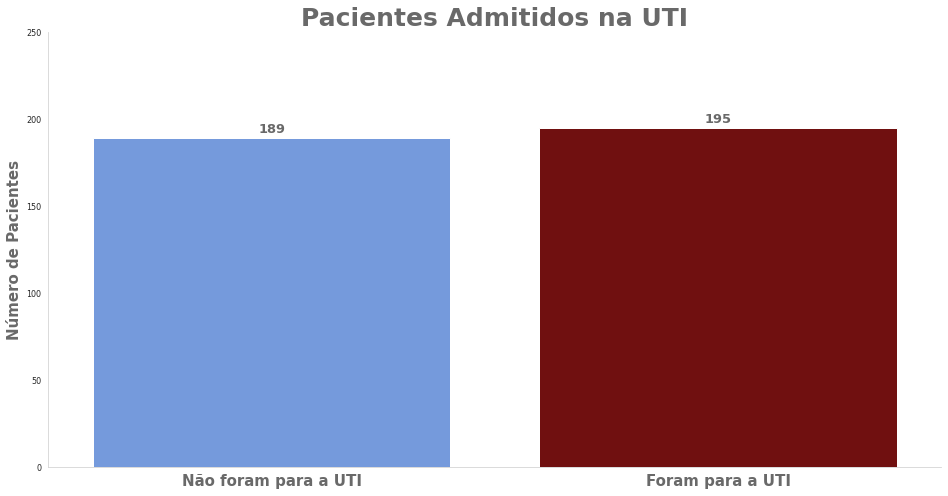

In [12]:
# define o estilo do plot
sns.set_style('white')

# cria a figura e define o tamanho
fig, ax = plt.subplots(figsize=(16, 8))

# cria o gráfico
sns.countplot(data=dados_pacientes, x=dados_pacientes['icu'], palette=cor_uti, dodge=False, ax=ax)

# define o título
plt.title('Pacientes Admitidos na UTI', fontsize=25, fontweight='bold',
          color='dimgrey')

# parâmetros do eixo Y
plt.ylim(0, 250)
plt.ylabel('Número de Pacientes', fontsize=15, color='dimgrey',
           fontweight='bold')
plt.yticks(fontsize=8)

# parâmetros do eixo X
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Não foram para a UTI', 'Foram para a UTI'],
           fontsize=15, fontweight='bold', color='dimgrey')

# parâmetros das linhas ao redor do gráfico
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
sns.despine()

total = []
for p in ax.patches:
  total.append(p.get_height())

total = sum(total)

for p in ax.patches:
  ax.text(p.get_x() + .37, p.get_height() + 3, str(p.get_height()),
          fontsize=13, color='dimgrey', fontweight='bold')

# mostra o gráfico
plt.show()

A imagem acima mostra que dos **384 pacientes**, **195 foram para a UTI** em algum momento após a chegada ao Hospital Sírio Libanês.



## Questão 2 - Quantos pacientes eram do sexo masculino ou feminino?

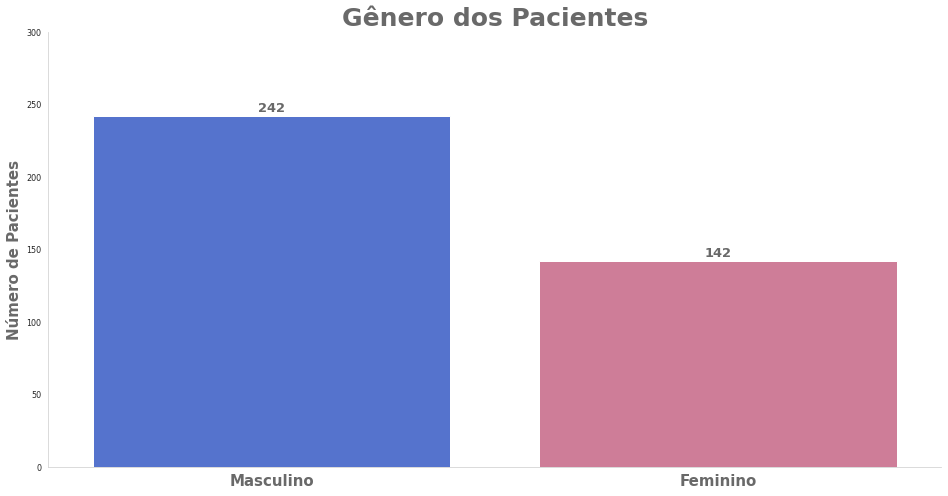

In [13]:
# define o estilo do plot
sns.set_style('white')

# cria a figura e define o tamanho
fig, ax = plt.subplots(figsize=(16, 8))

# cria o gráfico
sns.countplot(data=dados_pacientes, x=dados_pacientes['gender'], palette=cor_gender, dodge=False)

# define o título
plt.title('Gênero dos Pacientes', fontsize=25, fontweight='bold',
          color='dimgrey')

# parâmetros do eixo Y
plt.ylim(0, 300)
plt.ylabel('Número de Pacientes', fontsize=15, color='dimgrey',
           fontweight='bold')
plt.yticks(fontsize=8)

# parâmetros do eixo X
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'],
           fontsize=15, fontweight='bold', color='dimgrey')

# parâmetros das linhas ao redor do gráfico
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
sns.despine()

total = []
for p in ax.patches:
  total.append(p.get_height())

total = sum(total)

for p in ax.patches:
  ax.text(p.get_x() + .37, p.get_height() + 3, str(p.get_height()),
          fontsize=13, color='dimgrey', fontweight='bold')

# mostra o gráfico
plt.show()

A imagem acima mostra que dos **384 pacientes**, **242** são do **sexo masculino** e **142** são do **sexo feminino**.

Com essa separação dos pacientes de acordo com o gênero, será que há alguma relação entre o gênero e se o paciente foi para a UTI?

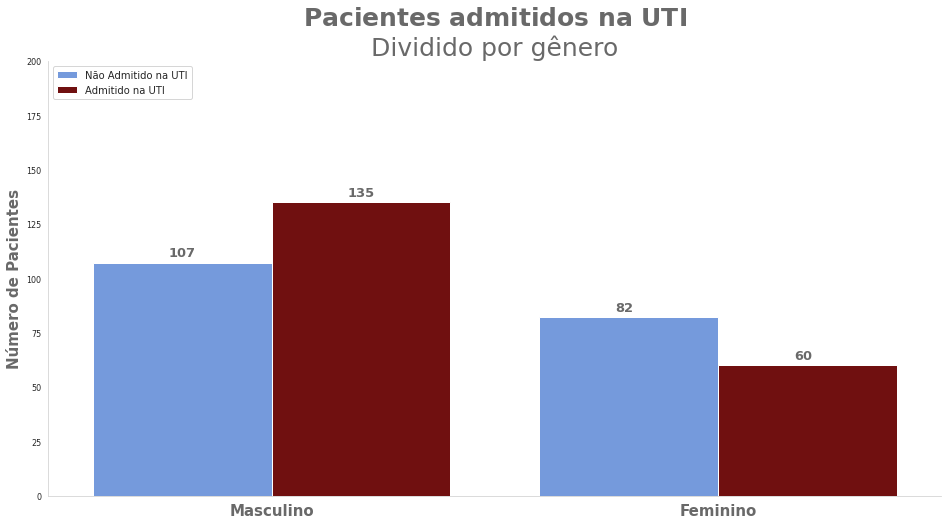

In [14]:
# define o estilo do plot
sns.set_style('white')

# cria a figura e define o tamanho
fig, ax = plt.subplots(figsize=(16, 8))

# cria o gráfico
sns.countplot(data=dados_pacientes, x='gender', hue='icu', palette=cor_uti)

# define o título
plt.title('$\\bf{Pacientes\ admitidos\ na\ UTI}$\nDividido por gênero', fontsize=25,
          color='dimgrey')

# parâmetros do eixo Y
plt.ylim(0, 200)
plt.ylabel('Número de Pacientes', fontsize=15, color='dimgrey',
           fontweight='bold')
plt.yticks(fontsize=8)

# parâmetros do eixo X
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'],
           fontsize=15, fontweight='bold', color='dimgrey')

# parâmetros das linhas ao redor do gráfico
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
sns.despine()

total = []
for p in ax.patches:
  total.append(p.get_height())

total = sum(total)

for p in ax.patches:
  ax.text(p.get_x() + .17, p.get_height() + 3, str(p.get_height()),
          fontsize=13, color='dimgrey', fontweight='bold')

# define a legenda
plt.legend(labels=['Não Admitido na UTI', 'Admitido na UTI'], loc='upper left')

# mostra o gráfico
plt.show()

A imagem acima demonstra que o número de pacientes do **gênero masculino** que foram admitidos na **UTI (55%)** é, proporcionalmente, **maior** que o número de paciente do **gênero feminino admitidos na UTI (42%)**.

Somente com essa informação **NÃO** é possível afirmar que o gênero do paciente é um fator determinante para a admissão na UTI.

## Questão 3 - Quantos pacientes são idosos e não idosos?

Para essa questão a idade que divide os pacientes em idosos ou não é 65 anos.

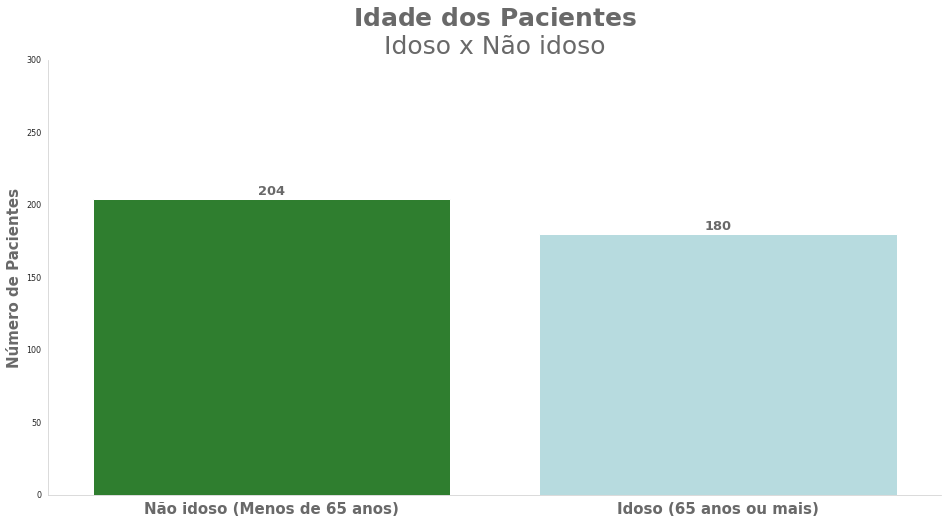

In [15]:
# define o estilo do plot
sns.set_style('white')

# cria a figura e define o tamanho
fig, ax = plt.subplots(figsize=(16, 8))

# cria o gráfico
sns.countplot(data=dados_pacientes, x=dados_pacientes['age_above65'],
              palette=cor_idoso, dodge=False)

# define o título
plt.title('$\\bf{Idade\ dos\ Pacientes}$\nIdoso x Não idoso', fontsize=25,
          color='dimgrey')

# parâmetros do eixo Y
plt.ylim(0, 300)
plt.ylabel('Número de Pacientes', fontsize=15, color='dimgrey',
           fontweight='bold')
plt.yticks(fontsize=8)

# parâmetros do eixo X
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Não idoso (Menos de 65 anos)', 'Idoso (65 anos ou mais)'],
           fontsize=15, fontweight='bold', color='dimgrey')

# parâmetros das linhas ao redor do gráfico
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
sns.despine()

total = []
for p in ax.patches:
  total.append(p.get_height())

total = sum(total)

for p in ax.patches:
  ax.text(p.get_x() + .37, p.get_height() + 3, str(p.get_height()),
          fontsize=13, color='dimgrey', fontweight='bold')

# mostra o gráfico
plt.show()

A imagem acima mostra que a base de dados possui **180 pacientes idosos (47%)** e **204 pacientes não idosos (53%)**.

Com essa informação é possível verificar se a idade é uma variável importante na admissão de pacientes na UTI.

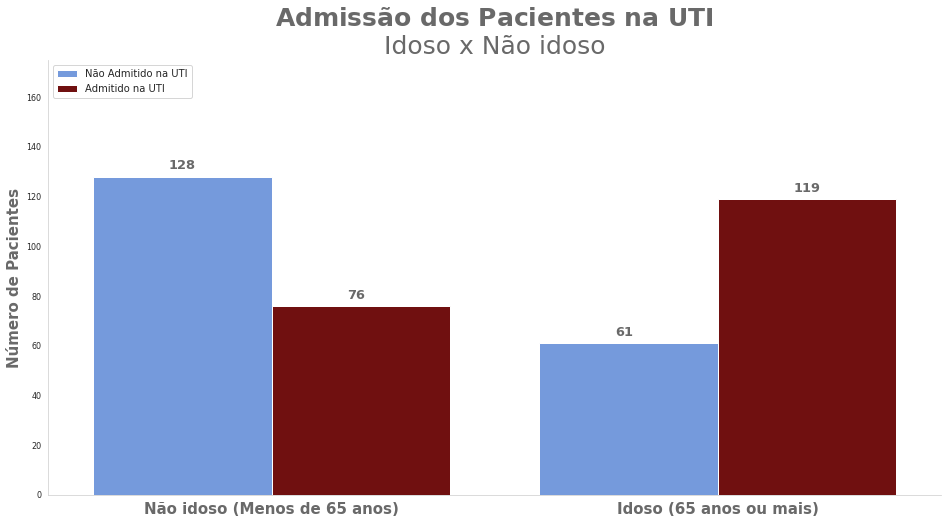

In [16]:
# define o estilo do plot
sns.set_style('white')

# cria a figura e define o tamanho
fig, ax = plt.subplots(figsize=(16, 8))

# cria o gráfico
sns.countplot(data=dados_pacientes, x=dados_pacientes['age_above65'], hue='icu',
              palette=cor_uti)

# define o título
plt.title('$\\bf{Admissão\ dos\ Pacientes\ na\ UTI}$\nIdoso x Não idoso', fontsize=25,
          color='dimgrey')

# parâmetros do eixo Y
plt.ylim(0, 175)
plt.ylabel('Número de Pacientes', fontsize=15, color='dimgrey',
           fontweight='bold')
plt.yticks(fontsize=8)

# parâmetros do eixo X
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Não idoso (Menos de 65 anos)', 'Idoso (65 anos ou mais)'],
           fontsize=15, fontweight='bold', color='dimgrey')

# parâmetros das linhas ao redor do gráfico
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
sns.despine()

# adiciona o valor acima das colunas no gráfico
total = []
for p in ax.patches:
  total.append(p.get_height())

total = sum(total)

for p in ax.patches:
  ax.text(p.get_x() + .17, p.get_height() + 3, str(p.get_height()),
          fontsize=13, color='dimgrey', fontweight='bold')
  
# define a legenda
plt.legend(labels=['Não Admitido na UTI', 'Admitido na UTI'], loc='upper left')

# mostra o gráfico
plt.show()

A imagem acima demonstra como a **idade É um fator importante** na evolução da doença Covid-19.

Entre os pacientes **não idosos 37% foram admitidos na UTI**, para os pacientes **idosos 66% foram admitidos na UTI**.

De acordo com a **Organização Mundial da Saúde (World Health Organization)**, pessoas idosas que são contaminadas pelo coronavírus tem um risco maior de desenvolver uma versão severa da doença devido as mudanças fisiológicas que acontecem com o envelhecimento e por possíveis doenças já existentes.


## Questão 4 - Entre os pacientes idosos, quantos foram internados diretamente na UTI?

In [17]:
# selecionando paciente idosos e que foram para a UTI
dados_idosos_uti = dados.query("age_above65 == 1 and window == '0-2' and icu == 1")
dados_idosos_uti.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease grouping 1,disease grouping 2,disease grouping 3,disease grouping 4,disease grouping 5,disease grouping 6,htn,immunocompromised,other,albumin_median,albumin_mean,albumin_min,albumin_max,albumin_diff,be_arterial_median,be_arterial_mean,be_arterial_min,be_arterial_max,be_arterial_diff,be_venous_median,be_venous_mean,be_venous_min,be_venous_max,be_venous_diff,bic_arterial_median,bic_arterial_mean,bic_arterial_min,bic_arterial_max,bic_arterial_diff,bic_venous_median,bic_venous_mean,bic_venous_min,bic_venous_max,bic_venous_diff,billirubin_median,billirubin_mean,...,dimer_max,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_median,bloodpressure_sistolic_median,heart_rate_median,respiratory_rate_median,temperature_median,oxygen_saturation_median,bloodpressure_diastolic_min,bloodpressure_sistolic_min,heart_rate_min,respiratory_rate_min,temperature_min,oxygen_saturation_min,bloodpressure_diastolic_max,bloodpressure_sistolic_max,heart_rate_max,respiratory_rate_max,temperature_max,oxygen_saturation_max,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.210526,-0.210526,-0.210526,-0.210526,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.00000,-1.00000,-1.00000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.219512,-0.219512,-0.219512,-0.219512,-1.0,-0.967556,-0.967556,...,-0.978029,-1.0,-0.283951,-0.046154,0.188679,0.830508,-0.107143,1.000000,-0.283951,-0.046154,0.188679,0.862069,-0.107143,1.000000,-0.072165,0.1500,0.264957,1.000000,0.318681,1.000000,-0.504274,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0-2,1
135,27,1,60th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.679144,-0.679144,-0.679144,-0.679144,-1.0,-1.00000,-1.00000,-1.00000,-1.00000,-1.0,-0.219512,-0.219512,-0.219512,-0.219512,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.966510,-0.966510,...,-0.967082,-1.0,0.209877,0.030769,-0.056604,-0.525424,0.214286,0.684211,0.209877,0.030769,-0.056604,-0.517241,0.214286,0.684211,0.340206,0.2125,0.042735,-0.428571,0.516484,0.878788,-0.162393,-0.275676,-0.253731,-0.575758,-0.014493,0.684211,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0-2,1
205,41,1,70th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.73822,-0.73822,-0.73822,-0.73822,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.170732,-0.170732,-0.170732,-0.170732,-1.0,-0.976975,-0.976975,...,-0.524265,-1.0,-0.104056,-0.059341,-0.832884,-0.118644,-0.214286,0.834586,-0.061728,-0.138462,-0.849057,-0.103448,-0.142857,0.736842,-0.154639,-0.1750,-0.675214,0.000000,-0.010989,0.858586,-0.196581,-0.048649,-0.791045,-0.212121,-0.304348,1.000000,-0.617391,-0.361963,-0.908397,-1.0,-0.666667,-0.858586,-0.689777,-0.399526,-0.891572,-1.0,-0.663881,-0.858709,0-2,1
270,54,1,60th,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.00000,-1.00000,-1.00000,-1.00000,-1.0,-0.463415,-0.463415,-0.463415,-0.463415,-1.0,-0.609756,-0.609756,-0.609756,-0.609756,-1.0,-0.979069,-0.979069,...,-0.978029,-1.0,-0.190123,-0.550769,-0.207547,-0.254237,0.678571,0.842105,-0.234568,-0.553846,-0.207547,-0.241379,0.678571,0.842105,-0.051546,-0.3250,-0.094017,-0.142857,0.802198,0.939394,-0.367521,-0.621622,-0.373134,-0.333333,0.362319,0.842105,-0.8782

In [18]:
dimensao_dados(dados_idosos_uti)

O dataframe possui 19 linhas e 231 colunas.


São **19 pacientes idosos** que foram admitidos no Hospital Sírio Libanês diretamente na UTI.

# Conclusões

Ao analisar, e visualizar, informações da base de dados do Hospital Sírio Libanês é possível tirar algumas conclusões:

- A base de dados possui informações sobre 384 pacientes;
> - 242 do sexo masculino;
> - 142 do sexo feminino;
> - 204 não são idosos;
> - 180 são idosos;

- Sobre a admissão de pacientes na UTI:
> - É possível verificar nos dados a relação entre a idade do paciente e a necessidade de admissão na UTI. Conforme comprovado pela Organização Mundial de Saúde, pacientes idosos tem probabilidade maior de necessitarem de um leito de UTI ao contrair Covid-19.
> - Não é possível apontar uma relação entre o gênero do paciente e a necessidade de um leito de UTI.

A análise exploratória e visualização dos dados se encerra aqui. O próximo passo é o desenvolvimento de modelos de Machine Learning que predizem se um paciente necessitará de UTI ou não.

As outras partes desse projeto podem ser vistas acessando os links abaixo:

- Parte 1 - Tratamento dos dados
- Parte 3 - Modelos de Machine Learning



## Referências utilizadas durante o projeto

1. [Página do Kaggle com informações sobre a base de dados](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

2. [Text classification with extremely small datasets](https://towardsdatascience.com/text-classification-with-extremely-small-datasets-333d322caee2)

3. [5 Feature Selection Method From SciKit Learn You Should Know](https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172)

4. [Como Selecionar As Melhores Features Para Seu Modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

5. [Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/)

6. [Primeiro caso de Covid-19 pode ter atingindo a Chine em outubro](https://www.cnnbrasil.com.br/saude/primeiro-caso-covid-19-pode-ter-atingido-a-china-em-outubro-de-2019-diz-estudo/)

7. [Evolução dos Sintomas do Covid-19](https://saude.abril.com.br/medicina/casos-sem-sintomas-evolucoes-coronavirus/)

8. [Covid Impact to Global Healthcare](https://edition.cnn.com/videos/world/2021/04/14/covid-impact-global-healthcare-lon-orig.cnn)

9. [Observatório Covid-19 aponta maior colapso sanitário e hospitalar da história do Brasil](https://portal.fiocruz.br/noticia/observatorio-covid-19-aponta-maior-colapso-sanitario-e-hospitalar-da-historia-do-brasil)

10. [Primeiro caso Covid-19 no Brasil](https://saude.abril.com.br/medicina/coronavirus-primeiro-caso-brasil/)

11. [Overfitting e Underfitting em Machine Learning](https://abracd.org/overfitting-e-underfitting-em-machine-learning/#:~:text=Underfitting%20%C3%A9%20uma%20tradu%C3%A7%C3%A3o%20para,Overfitting%20%C3%A9%20o%20oposto)

12. [WHO delivers advice and support for older people during Covid-19](https://www.who.int/news-room/feature-stories/detail/who-delivers-advice-and-support-for-older-people-during-covid-19#:~:text=The%20COVID%2D19%20pandemic,potential%20underlying%20health%20conditions)

13. [Machine Learning in Healthcare](https://healthinformatics.uic.edu/blog/machine-learning-in-healthcare/)

14. [Machine Learning](https://www.ibm.com/cloud/learn/machine-learning)

15. [Hiperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624)

16. [SKLearn Model Selection - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

17. [Entenda o que é AUC e ROC nos modelos de Machine Learning](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

18. [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

19. [Understanding a Classification Report For Your Machine Learning Model](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

20. [Understanding AUC ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

21. [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica)

22. [SciKit Learn - RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

23. [SciKit Learn - Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

24. [SciKit Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

25. [SciKit Learn - LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)